In [392]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from mmq import metodo_minimos_quadrados

In [393]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("dados", "df_tabela_ligantes.xlsx")
)

df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [394]:
df_duracoes = pd.read_excel(
    os.path.join("dados", "df_duracoes.xlsx")
)

df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

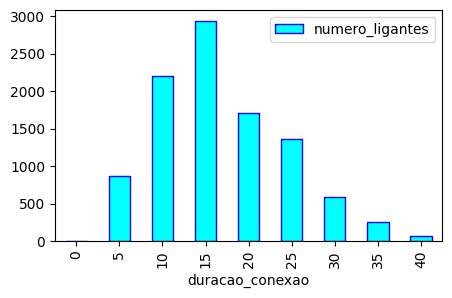

In [395]:
df_duracoes.plot(
                 x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5,3),
                 color="cyan",
                 edgecolor="blue"
                 )

<Axes: xlabel='percentagem_acumulada', ylabel='duracao_conexao'>

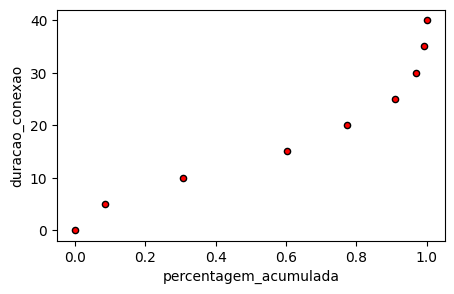

In [396]:
df_duracoes.plot(
                 x="percentagem_acumulada",
                 y="duracao_conexao",
                 kind="scatter",
                 figsize=(5,3),
                 color="red",
                 edgecolor="black"
                 )

In [397]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)

coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [398]:
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)
print(x[::100].round(1))
print(y[::100].round(1))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ -0.2   5.9   7.9   9.3  11.3  13.8  16.   17.6  19.4  24.2]


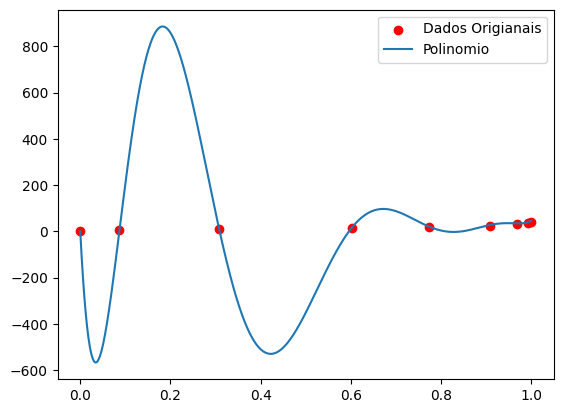

In [399]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8   # aumetei o grau do polinomio de 5 para 8 oara ver o overfitting
)
# ------------------------------------------------------------------------
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(
            percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Origianais",
            )
# ------------------------------------------------------------------------
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

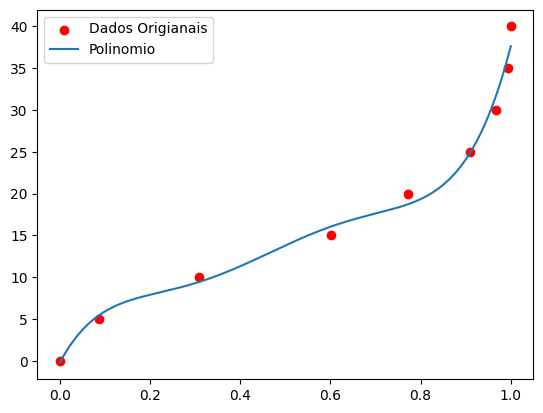

In [400]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5   # voltei o 5
)
# ------------------------------------------------------------------------
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(
            percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Origianais",
            )
# ------------------------------------------------------------------------
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

In [401]:
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [402]:
np.polyval(coefs, 0)

-0.20625385920448025

In [403]:
np.polyval(coefs, 5)

1381888.8377561844

In [404]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [405]:
tempos_aleatorios = []

for _ in range(10,1000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

14.26179148336721

In [406]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [407]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [408]:
df_tabela_ligantes.loc[0, "numero_medio_ligantes"]

601

In [409]:
qtd_ligacoes = df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

601

In [410]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size = qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [411]:
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


In [412]:
df_duracoes.loc[0, "duracao_conexao"]

0

In [413]:
df_duracoes.iloc[0, 0]

0

In [414]:
momentos_ligacoes

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723, 277, 754, 804,
       599,  70, 472, 600, 396, 314, 705, 486, 551,  87, 174, 600, 849,
       677, 537, 845,  72, 777, 115, 755, 709, 847, 431, 448, 850,  99,
       177, 755, 797, 659, 147, 423, 288, 265, 697, 639, 544, 543, 714,
       244, 151, 675, 510, 459, 882, 183,  28, 802, 128, 128,  53, 550,
       488, 756, 273, 335, 388, 617,  42, 442, 543, 888, 257, 321,  57,
       291, 870, 119, 779, 430,  82,  91, 896, 398, 611, 565, 633,  84,
       203, 324, 774,  47, 639, 131, 868, 180, 846, 143, 660, 227, 791,
       719, 373, 853, 560, 305, 581, 169, 675, 448,  95, 197, 606, 256,
       881, 690, 292, 816, 861, 387, 610, 554, 368, 201, 383, 512, 370,
       555, 383,  23, 699, 130, 377,  98, 574, 734, 123, 594, 739, 148,
       209, 562, 411, 782,  41,  58, 705,  36, 778,  86,  43, 872,  11,
       770, 307,  80,  32, 182, 128, 806, 275, 174, 554, 371, 184, 444,
       488, 589, 286, 280, 637, 770, 515,  94, 226, 875, 269, 88

In [415]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [416]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [417]:
# coemçar as simulacoes


In [418]:
atendentes: list[dict] = []

In [419]:
np.set_printoptions(legacy = "1.13")  # vou impor essa versão para não imprimir informacoes alem das que eu quero quando dou um "print"

In [420]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [421]:
np.random.seed(0)

aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)


14.9651548682


In [422]:
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154868196022}]

In [423]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [424]:
espera_maxima = 10
tempo_descanso = 0

In [425]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)


11.7186119095


In [426]:
atendentes

[{'inicio': 0, 'fim': 14.965154868196022}]

In [427]:
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if  momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False

    if not ocupado:

        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim
        
        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break

else:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes


[{'inicio': 0, 'fim': 14.965154868196022},
 {'inicio': 3, 'fim': 14.718611909498971}]

In [428]:
for momento_ligacao in momentos_ligacoes:
    print(momento_ligacao)

0
3
4
4
7
9
11
11
13
13
16
19
23
24
24
25
26
28
29
29
32
32
33
36
36
41
41
42
43
43
44
47
53
53
56
57
58
59
61
63
67
69
70
72
72
73
74
80
80
82
83
84
86
87
87
87
88
89
91
91
93
93
94
94
95
98
99
102
106
106
107
110
111
112
114
115
117
119
120
121
123
126
128
128
128
128
129
129
130
131
134
135
136
136
136
137
138
139
139
143
146
147
147
148
148
148
149
149
151
152
152
153
160
163
164
166
168
169
174
174
174
174
176
177
180
180
182
183
184
189
191
192
195
197
197
197
199
201
201
201
201
203
207
207
209
209
209
209
212
213
216
217
219
221
223
225
226
226
226
227
227
228
228
232
234
237
244
246
248
248
254
256
256
256
257
259
260
265
265
269
273
273
274
274
274
275
276
277
280
280
281
282
284
284
286
287
288
289
290
290
291
291
291
292
292
296
297
300
305
305
307
307
307
314
314
321
322
323
323
323
324
324
324
326
326
327
328
329
335
336
339
340
341
341
343
347
347
348
349
353
355
357
357
359
360
360
365
368
368
369
369
370
371
371
373
373
376
376
377
381
383
383
387
388
392
393
394
396
3

In [429]:
#for momento_ligacao in momentos_ligacoes:
    #print(momento_ligacao)

    

In [430]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.4037564982807},
 {'inicio': 906, 'fim': 917.86945228372167},
 {'inicio': 909, 'fim': 917.37356632866181},
 {'inicio': 900, 'fim': 912.04701461181367},
 {'inicio': 906, 'fim': 913.54143974652425},
 {'inicio': 906, 'fim': 909.2110175449335},
 {'inicio': 907, 'fim': 923.65667308248339},
 {'inicio': 898, 'fim': 910.80468815160725},
 {'inicio': 892, 'fim': 918.91345867401799},
 {'inicio': 892, 'fim': 899.6962495432706},
 {'inicio': 895, 'fim': 921.10612199350487},
 {'inicio': 894, 'fim': 924.69074239242343},
 {'inicio': 894, 'fim': 912.97138604541612},
 {'inicio': 895, 'fim': 911.50408245771962},
 {'inicio': 896, 'fim': 906.24103253233636},
 {'inicio': 896, 'fim': 913.60372669768321},
 {'inicio': 899, 'fim': 917.10414350589645},
 {'inicio': 899, 'fim': 928.75678690002758},
 {'inicio': 899, 'fim': 903.08006092171786},
 {'inicio': 899, 'fim': 906.40232584615558}]

In [431]:
len(atendentes)

20

In [432]:
np.random.permutation([1,2,3,4,5,6,7,8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [433]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.29559843811921},
 {'inicio': 900, 'fim': 910.89334430853955},
 {'inicio': 899, 'fim': 932.21236755469567},
 {'inicio': 909, 'fim': 917.53861755803973},
 {'inicio': 904, 'fim': 920.23396461861057},
 {'inicio': 899, 'fim': 908.85265704300502},
 {'inicio': 867, 'fim': 894.9962068760093},
 {'inicio': 901, 'fim': 917.66657940193431},
 {'inicio': 907, 'fim': 915.17518229722555},
 {'inicio': 906, 'fim': 913.65133331310551},
 {'inicio': 896, 'fim': 906.82228408233289},
 {'inicio': 892, 'fim': 907.66966275774632},
 {'inicio': 882, 'fim': 901.13837905289324},
 {'inicio': 883, 'fim': 902.83508526014623},
 {'inicio': 814, 'fim': 843.61932082301757},
 {'inicio': 899, 'fim': 907.73089614696869},
 {'inicio': 896, 'fim': 912.80887286644202},
 {'inicio': 906, 'fim': 930.77650856562752},
 {'inicio': 906, 'fim': 914.0496784226475}]

In [434]:
len(atendentes)

19

In [435]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [436]:
# coloco em uma celula unica, generalizando.

In [437]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []
for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [438]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


---
# Attentus 

In [439]:
import pulp as plp

In [440]:
df_nan = df_tabela_ligantes.copy()
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [441]:
df_nad = pd.read_excel(
    os.path.join("dados", "nad.xlsx")
)

df_nad

,regime,enc
0,3,540
1,4,680
2,6,960


In [442]:
from itertools import product

In [443]:
df_nad

,regime,enc
0,3,540
1,4,680
2,6,960


In [444]:
df_nad["regime"]

0    3
1    4
2    6
Name: regime, dtype: int64

In [445]:
df_nad["regime"].to_dict()

{0: 3, 1: 4, 2: 6}

In [446]:
regimes = df_nad["regime"].to_dict()
regimes

{0: 3, 1: 4, 2: 6}

In [447]:
inicios = df_nan["hora_inicio"].to_dict()
inicios

{0: datetime.time(0, 0),
 1: datetime.time(0, 15),
 2: datetime.time(0, 30),
 3: datetime.time(0, 45),
 4: datetime.time(1, 0),
 5: datetime.time(1, 15),
 6: datetime.time(1, 30),
 7: datetime.time(1, 45),
 8: datetime.time(2, 0),
 9: datetime.time(2, 15),
 10: datetime.time(2, 30),
 11: datetime.time(2, 45),
 12: datetime.time(3, 0),
 13: datetime.time(3, 15),
 14: datetime.time(3, 30),
 15: datetime.time(3, 45),
 16: datetime.time(4, 0),
 17: datetime.time(4, 15),
 18: datetime.time(4, 30),
 19: datetime.time(4, 45),
 20: datetime.time(5, 0),
 21: datetime.time(5, 15),
 22: datetime.time(5, 30),
 23: datetime.time(5, 45),
 24: datetime.time(6, 0),
 25: datetime.time(6, 15),
 26: datetime.time(6, 30),
 27: datetime.time(6, 45),
 28: datetime.time(7, 0),
 29: datetime.time(7, 15),
 30: datetime.time(7, 30),
 31: datetime.time(7, 45),
 32: datetime.time(8, 0),
 33: datetime.time(8, 15),
 34: datetime.time(8, 30),
 35: datetime.time(8, 45),
 36: datetime.time(9, 0),
 37: datetime.time(9,

In [448]:
lista_variaveis = list(product(regimes, inicios))
lista_variaveis

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [449]:
prob = plp.LpProblem(
    name = "Attentus", sense = plp.LpMinimize
)

prob

Attentus:
MINIMIZE
None
VARIABLES

In [450]:
pulp_variaveis = plp.LpVariable.dicts(
    "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
)

pulp_variaveis

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [451]:
coeficientes = []

for indice_regime, indice_periodo in lista_variaveis:
    encargo = df_nad.loc[indice_regime, "enc"]
    coeficientes.append(encargo)

print(coeficientes[::10])
#print(coeficientes)

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 960, 960, 960, 960, 960, 960, 960, 960, 960]


In [452]:
# Funcao Objetivo

In [453]:
fo = plp.lpSum(
    [coef * pulp_variaveis[var]
     for coef, var in zip(coeficientes, lista_variaveis)]
)

prob += fo, "custo"

prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [454]:
# 02/08/2025

In [455]:
prob.numVariables()

288

In [456]:
prob.numConstraints()

0

In [457]:
lista = [0, 1, 2, 3, 4, 5, 6, 7]

In [458]:
janela = 3

In [459]:
# j=2
lista[0:3]

[0, 1, 2]

In [460]:
#j=3
lista[1:4]

[1, 2, 3]

In [461]:
# j=4
lista[2:5]

[2, 3, 4]

In [462]:
#j=5
lista[3:6]

[3, 4, 5]

In [463]:
#j=6
lista[4:7]

[4, 5, 6]

In [464]:
#j=7
lista[5:8]

[5, 6, 7]

In [465]:
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [466]:
#j=0
print(lista[6:])

[6, 7]


In [467]:
j=0
print(lista[-2:])

[6, 7]


In [468]:
j=0
print(lista[-2:], lista[0])

[6, 7] 0


In [469]:
j=0
print(lista[-2:], lista[:0])

[6, 7] []


In [470]:
j=0
print(lista[-2:], lista[:1])

[6, 7] [0]


In [471]:
j=0
print(lista[-2:]+lista[:1])

[6, 7, 0]


In [472]:
lista[-3:]+lista[:2]

[5, 6, 7, 0, 1]

In [473]:
lista[-1:]+lista[:2]

[7, 0, 1]

In [474]:
print(lista[-2:]+lista[:1])
print(lista[-1:]+lista[:2])
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [475]:
print(lista[0:3])   #j=2
print(lista[1:4])   #j=3
print(lista[2:5])   #j=4
print(lista[3:6])   #j=5
print(lista[4:7])   #j=6
print(lista[5:8])   #j=7

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [476]:
print(lista[0:2+1])   #j=2, jan=3
print(lista[1:3+1])   #j=3, jan=3
print(lista[2:4+1])   #j=4, jan=3
print(lista[3:5+1])   #j=5, jan=3
print(lista[4:6+1])   #j=6, jan=3
print(lista[5:7+1])   #j=7, jan=3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [477]:
print(lista[2-3+1:2+1])   #j=2, jan=3
print(lista[3-3+1:3+1])   #j=3, jan=3
print(lista[4-3+1:4+1])   #j=4, jan=3
print(lista[5-3+1:5+1])   #j=5, jan=3
print(lista[6-3+1:6+1])   #j=6, jan=3
print(lista[7-3+1:7+1])   #j=7, jan=3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [478]:
print(lista[-2:]+lista[:1])     #j=0,  jan=3
print(lista[-1:]+lista[:2])     #j=1, jan=3


[6, 7, 0]
[7, 0, 1]


In [479]:
print(lista[-2:], lista[:1])     #j=0,  jan=3
print(lista[-1:], lista[:2])     #j=1, jan=3


[6, 7] [0]
[7] [0, 1]


In [480]:
print(lista[0-3+1:], lista[:1])     #j=0,  jan=3
print(lista[1-3+1:], lista[:2])     #j=1, jan=3


[6, 7] [0]
[7] [0, 1]


In [481]:
print(lista[0-3+1:], lista[:0+1])     #j=0,  jan=3
print(lista[1-3+1:], lista[:1+1])     #j=1, jan=3


[6, 7] [0]
[7] [0, 1]


In [482]:
print(lista[0-3+1:]+ lista[:0+1])     #j=0,  jan=3
print(lista[1-3+1:]+ lista[:1+1])     #j=1, jan=3


[6, 7, 0]
[7, 0, 1]


In [483]:
print(lista[0-3+1:]+ lista[:0+1])     #j=0,  jan=3
print(lista[1-3+1:]+ lista[:1+1])     #j=1, jan=3
print(lista[2-3+1:2+1])   #j=2, jan=3
print(lista[3-3+1:3+1])   #j=3, jan=3
print(lista[4-3+1:4+1])   #j=4, jan=3
print(lista[5-3+1:5+1])   #j=5, jan=3
print(lista[6-3+1:6+1])   #j=6, jan=3
print(lista[7-3+1:7+1])   #j=7, jan=3

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [484]:
print(lista[0-3+1:]+ lista[:0+1])     #j=0,  jan=3
print(lista[1-3+1:]+ lista[:1+1])     #j=1, jan=3
print(lista[2-3+1:2+1])   #j=2, jan=3
print(lista[3-3+1:3+1])   #j=3, jan=3
print(lista[4-3+1:4+1])   #j=4, jan=3
print(lista[5-3+1:5+1])   #j=5, jan=3
print(lista[6-3+1:6+1])   #j=6, jan=3
print(lista[7-3+1:7+1])   #j=7, jan=3

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [485]:
def retorna_lista(j, tamanho, lista):   #tamanho aqui é a janela (jan) usada até agora...
    if j >= tamanho - 1:
        return lista[j-tamanho+1 : j+1]
    else:
        return lista[j-tamanho+1:] + lista[:j+1]

In [486]:
retorna_lista(j=4, tamanho=3, lista=lista)

[2, 3, 4]

In [487]:
retorna_lista(j=5, tamanho=3, lista=lista)

[3, 4, 5]

In [488]:
retorna_lista(j=6, tamanho=3, lista=lista)

[4, 5, 6]

In [489]:
retorna_lista(j=7, tamanho=3, lista=lista)

[5, 6, 7]

In [490]:
retorna_lista(j=0, tamanho=3, lista=lista)

[6, 7, 0]

In [491]:
retorna_lista(j=1, tamanho=3, lista=lista)

[7, 0, 1]

In [492]:
retorna_lista(j=95, tamanho=12, 
              lista=list((inicios)))

[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]

In [493]:
retorna_lista(j=0, tamanho=12, 
              lista=list((inicios)))

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]

In [494]:
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [495]:
for x in df_nan:
    print (x)

rotulo
hora_inicio
hora_fim
numero_medio_ligantes
nan


In [496]:
for j, linha in df_nan.iterrows():
    print(j, linha, sep="\n")
    print("-" *50)

0
rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
nan                            20
Name: 0, dtype: object
--------------------------------------------------
1
rotulo                          2
hora_inicio              00:15:00
hora_fim                 00:30:00
numero_medio_ligantes         190
nan                             9
Name: 1, dtype: object
--------------------------------------------------
2
rotulo                          3
hora_inicio              00:30:00
hora_fim                 00:45:00
numero_medio_ligantes         180
nan                             8
Name: 2, dtype: object
--------------------------------------------------
3
rotulo                          4
hora_inicio              00:45:00
hora_fim                 01:00:00
numero_medio_ligantes         177
nan                             9
Name: 3, dtype: object
--------------------------------------------------
4
rotulo        

In [497]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    print(j, nan)

0 20
1 9
2 8
3 9
4 8
5 5
6 6
7 7
8 5
9 5
10 4
11 5
12 4
13 4
14 4
15 4
16 4
17 5
18 4
19 4
20 4
21 4
22 3
23 4
24 6
25 6
26 8
27 7
28 20
29 21
30 23
31 23
32 41
33 41
34 41
35 45
36 66
37 59
38 60
39 67
40 70
41 75
42 71
43 75
44 66
45 64
46 62
47 68
48 57
49 57
50 56
51 60
52 64
53 67
54 63
55 70
56 69
57 67
58 64
59 66
60 71
61 66
62 70
63 67
64 68
65 66
66 68
67 71
68 68
69 69
70 73
71 62
72 55
73 51
74 52
75 48
76 45
77 44
78 39
79 38
80 41
81 36
82 36
83 40
84 36
85 34
86 30
87 31
88 31
89 26
90 26
91 26
92 23
93 18
94 18
95 18


In [498]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    #print(j, nan)
    for regime in regimes:
        print(regime)

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


In [499]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    #print(j, nan)
    for regime in regimes:
        #print(regime)
        print(regimes[regime])

3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6
3
4
6


In [500]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    #print(j, nan)
    for regime in regimes:
        #print(regime)
        #print(regimes[regime])
        tamanho = regimes[regime] * 4 
        lista = retorna_lista(j=j, tamanho=tamanho,
                                                      lista=list(inicios))
        print(lista)
    print("-" *20)


[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]
[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]
--------------------
[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1]
[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1]
[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1]
--------------------
[87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2]
[83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2]
[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2]
--------------------
[88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3]
[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3]
[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3]
--------------------
[89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3, 4]
[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3, 4

In [501]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    #print(j, nan)
    for regime in regimes:
        #print(regime)
        #print(regimes[regime])
        tamanho = regimes[regime] * 4 
        lista = retorna_lista(j=j, tamanho=tamanho,
                                                      lista=list(inicios))
        print(regime, lista)
    print("-" *20)


0 [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]
1 [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]
2 [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]
--------------------
0 [86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1]
1 [82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1]
2 [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1]
--------------------
0 [87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2]
1 [83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2]
2 [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2]
--------------------
0 [88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3]
1 [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3]
2 [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3]
--------------------
0 [89, 90, 91, 92, 93, 94, 95, 0, 1, 2, 3, 4]
1 [85, 86, 87, 88, 89, 90, 91, 9

In [502]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    #print(j, nan)
    for regime in regimes:
        #print(regime)
        #print(regimes[regime])
        tamanho = regimes[regime] * 4 
        lista = retorna_lista(j=j, tamanho=tamanho,
                                                      lista=list(inicios))
        #print(regime, lista)
        lista_combinada = [(regime, i) for i in lista]
        print(lista_combinada)
    print("-" *20)


[(0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 0)]
[(1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 0)]
[(2, 73), (2, 74), (2, 75), (2, 76), (2, 77), (2, 78), (2, 79), (2, 80), (2, 81), (2, 82), (2, 83), (2, 84), (2, 85), (2, 86), (2, 87), (2, 88), (2, 89), (2, 90), (2, 91), (2, 92), (2, 93), (2, 94), (2, 95), (2, 0)]
--------------------
[(0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 0), (0, 1)]
[(1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 0), (1, 1)]
[(2, 74), (2, 75), (2, 76), (2, 77), (2, 78), (2, 79), (2, 80), (2, 81), (2, 82), (2, 83), (2, 84), (2, 85), (2, 86), (2, 87), (2, 88), (2, 89), (2, 90), (2, 91), (2, 92), (2, 93), (2, 94), (2, 95), (2, 0), (2, 1)]
--------------------
[(0, 87), (0, 88), (0, 89

In [503]:
for j, linha in df_nan.iterrows():
    #print(j, linha, sep="\n")
    #print("-" *50)
    nan = linha["nan"]
    #print(j, nan)
    for regime in regimes:
        #print(regime)
        #print(regimes[regime])
        tamanho = regimes[regime] * 4 
        lista = retorna_lista(j=j, tamanho=tamanho,
                                                      lista=list(inicios))
        #print(regime, lista)
        lista_combinada = [(regime, i) for i in lista]
        lista_traduzida = [pulp_variaveis[tupla]
                           for tupla in lista_combinada]
        print(lista_traduzida)
    print("-" *20)


[A_(0,_85), A_(0,_86), A_(0,_87), A_(0,_88), A_(0,_89), A_(0,_90), A_(0,_91), A_(0,_92), A_(0,_93), A_(0,_94), A_(0,_95), A_(0,_0)]
[A_(1,_81), A_(1,_82), A_(1,_83), A_(1,_84), A_(1,_85), A_(1,_86), A_(1,_87), A_(1,_88), A_(1,_89), A_(1,_90), A_(1,_91), A_(1,_92), A_(1,_93), A_(1,_94), A_(1,_95), A_(1,_0)]
[A_(2,_73), A_(2,_74), A_(2,_75), A_(2,_76), A_(2,_77), A_(2,_78), A_(2,_79), A_(2,_80), A_(2,_81), A_(2,_82), A_(2,_83), A_(2,_84), A_(2,_85), A_(2,_86), A_(2,_87), A_(2,_88), A_(2,_89), A_(2,_90), A_(2,_91), A_(2,_92), A_(2,_93), A_(2,_94), A_(2,_95), A_(2,_0)]
--------------------
[A_(0,_86), A_(0,_87), A_(0,_88), A_(0,_89), A_(0,_90), A_(0,_91), A_(0,_92), A_(0,_93), A_(0,_94), A_(0,_95), A_(0,_0), A_(0,_1)]
[A_(1,_82), A_(1,_83), A_(1,_84), A_(1,_85), A_(1,_86), A_(1,_87), A_(1,_88), A_(1,_89), A_(1,_90), A_(1,_91), A_(1,_92), A_(1,_93), A_(1,_94), A_(1,_95), A_(1,_0), A_(1,_1)]
[A_(2,_74), A_(2,_75), A_(2,_76), A_(2,_77), A_(2,_78), A_(2,_79), A_(2,_80), A_(2,_81), A_(2,_82), A

In [504]:
for j, linha in df_nan.iterrows():
    nan = linha["nan"]
    linha_restricao = []
    for regime in regimes:
        tamanho = regimes[regime] * 4 
        lista = retorna_lista(j=j, tamanho=tamanho,
                                                      lista=list(inicios))
        lista_combinada = [(regime, i) for i in lista]
        lista_traduzida = [pulp_variaveis[tupla]
                           for tupla in lista_combinada]
        linha_restricao += lista_traduzida

    prob += plp.lpSum(linha_restricao) >= nan
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [505]:
prob.numConstraints()

96

In [506]:
prob.status

0

In [507]:
plp.LpStatus

{0: 'Not Solved',
 1: 'Optimal',
 -1: 'Infeasible',
 -2: 'Unbounded',
 -3: 'Undefined'}

In [508]:
plp.listSolvers(onlyAvailable=True)

['PULP_CBC_CMD']

In [509]:
solver = plp.getSolver('PULP_CBC_CMD')

In [510]:
prob.solve(solver)

1

In [511]:
prob.objective.value()

153480.0

In [512]:
for i, v in enumerate(prob.variables()):
    print(v.name, "=", v.varValue)

A_(0,_0) = 0.0
A_(0,_1) = 0.0
A_(0,_10) = 0.0
A_(0,_11) = 0.0
A_(0,_12) = 0.0
A_(0,_13) = 0.0
A_(0,_14) = 0.0
A_(0,_15) = 0.0
A_(0,_16) = 0.0
A_(0,_17) = 0.0
A_(0,_18) = 0.0
A_(0,_19) = 0.0
A_(0,_2) = 0.0
A_(0,_20) = 0.0
A_(0,_21) = 0.0
A_(0,_22) = 0.0
A_(0,_23) = 0.0
A_(0,_24) = 0.0
A_(0,_25) = 0.0
A_(0,_26) = 0.0
A_(0,_27) = 0.0
A_(0,_28) = 0.0
A_(0,_29) = 0.0
A_(0,_3) = 0.0
A_(0,_30) = 0.0
A_(0,_31) = 0.0
A_(0,_32) = 0.0
A_(0,_33) = 0.0
A_(0,_34) = 0.0
A_(0,_35) = 0.0
A_(0,_36) = 5.0
A_(0,_37) = 0.0
A_(0,_38) = 0.0
A_(0,_39) = 0.0
A_(0,_4) = 0.0
A_(0,_40) = 0.0
A_(0,_41) = 0.0
A_(0,_42) = 0.0
A_(0,_43) = 0.0
A_(0,_44) = 0.0
A_(0,_45) = 0.0
A_(0,_46) = 0.0
A_(0,_47) = 0.0
A_(0,_48) = 0.0
A_(0,_49) = 0.0
A_(0,_5) = 0.0
A_(0,_50) = 0.0
A_(0,_51) = 0.0
A_(0,_52) = 0.0
A_(0,_53) = 0.0
A_(0,_54) = 0.0
A_(0,_55) = 0.0
A_(0,_56) = 0.0
A_(0,_57) = 0.0
A_(0,_58) = 3.0
A_(0,_59) = 0.0
A_(0,_6) = 0.0
A_(0,_60) = 0.0
A_(0,_61) = 0.0
A_(0,_62) = 0.0
A_(0,_63) = 0.0
A_(0,_64) = 0.0
A_(0,_65) = 0.0

In [513]:
resultados = []
for v_pulp, v_tupla in zip(prob.variables(), lista_variaveis):
    print(v_pulp, v_tupla)

A_(0,_0) (0, 0)
A_(0,_1) (0, 1)
A_(0,_10) (0, 2)
A_(0,_11) (0, 3)
A_(0,_12) (0, 4)
A_(0,_13) (0, 5)
A_(0,_14) (0, 6)
A_(0,_15) (0, 7)
A_(0,_16) (0, 8)
A_(0,_17) (0, 9)
A_(0,_18) (0, 10)
A_(0,_19) (0, 11)
A_(0,_2) (0, 12)
A_(0,_20) (0, 13)
A_(0,_21) (0, 14)
A_(0,_22) (0, 15)
A_(0,_23) (0, 16)
A_(0,_24) (0, 17)
A_(0,_25) (0, 18)
A_(0,_26) (0, 19)
A_(0,_27) (0, 20)
A_(0,_28) (0, 21)
A_(0,_29) (0, 22)
A_(0,_3) (0, 23)
A_(0,_30) (0, 24)
A_(0,_31) (0, 25)
A_(0,_32) (0, 26)
A_(0,_33) (0, 27)
A_(0,_34) (0, 28)
A_(0,_35) (0, 29)
A_(0,_36) (0, 30)
A_(0,_37) (0, 31)
A_(0,_38) (0, 32)
A_(0,_39) (0, 33)
A_(0,_4) (0, 34)
A_(0,_40) (0, 35)
A_(0,_41) (0, 36)
A_(0,_42) (0, 37)
A_(0,_43) (0, 38)
A_(0,_44) (0, 39)
A_(0,_45) (0, 40)
A_(0,_46) (0, 41)
A_(0,_47) (0, 42)
A_(0,_48) (0, 43)
A_(0,_49) (0, 44)
A_(0,_5) (0, 45)
A_(0,_50) (0, 46)
A_(0,_51) (0, 47)
A_(0,_52) (0, 48)
A_(0,_53) (0, 49)
A_(0,_54) (0, 50)
A_(0,_55) (0, 51)
A_(0,_56) (0, 52)
A_(0,_57) (0, 53)
A_(0,_58) (0, 54)
A_(0,_59) (0, 55)
A_(0,_6)

In [514]:
resultados = []
for v_tupla, v_pulp in pulp_variaveis.items():
    #print(v_pulp.varValue, v_tupla)
    indice_regime, indice_inicio = v_tupla
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]
    print(nome_regime, nome_inicio)

3 00:00:00
3 00:15:00
3 00:30:00
3 00:45:00
3 01:00:00
3 01:15:00
3 01:30:00
3 01:45:00
3 02:00:00
3 02:15:00
3 02:30:00
3 02:45:00
3 03:00:00
3 03:15:00
3 03:30:00
3 03:45:00
3 04:00:00
3 04:15:00
3 04:30:00
3 04:45:00
3 05:00:00
3 05:15:00
3 05:30:00
3 05:45:00
3 06:00:00
3 06:15:00
3 06:30:00
3 06:45:00
3 07:00:00
3 07:15:00
3 07:30:00
3 07:45:00
3 08:00:00
3 08:15:00
3 08:30:00
3 08:45:00
3 09:00:00
3 09:15:00
3 09:30:00
3 09:45:00
3 10:00:00
3 10:15:00
3 10:30:00
3 10:45:00
3 11:00:00
3 11:15:00
3 11:30:00
3 11:45:00
3 12:00:00
3 12:15:00
3 12:30:00
3 12:45:00
3 13:00:00
3 13:15:00
3 13:30:00
3 13:45:00
3 14:00:00
3 14:15:00
3 14:30:00
3 14:45:00
3 15:00:00
3 15:15:00
3 15:30:00
3 15:45:00
3 16:00:00
3 16:15:00
3 16:30:00
3 16:45:00
3 17:00:00
3 17:15:00
3 17:30:00
3 17:45:00
3 18:00:00
3 18:15:00
3 18:30:00
3 18:45:00
3 19:00:00
3 19:15:00
3 19:30:00
3 19:45:00
3 20:00:00
3 20:15:00
3 20:30:00
3 20:45:00
3 21:00:00
3 21:15:00
3 21:30:00
3 21:45:00
3 22:00:00
3 22:15:00
3 22:30:00

In [515]:
resultados = []
for v_tupla, v_pulp in pulp_variaveis.items():
    #print(v_pulp.varValue, v_tupla)
    indice_regime, indice_inicio = v_tupla
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]
    print(nome_regime, nome_inicio)

3 00:00:00
3 00:15:00
3 00:30:00
3 00:45:00
3 01:00:00
3 01:15:00
3 01:30:00
3 01:45:00
3 02:00:00
3 02:15:00
3 02:30:00
3 02:45:00
3 03:00:00
3 03:15:00
3 03:30:00
3 03:45:00
3 04:00:00
3 04:15:00
3 04:30:00
3 04:45:00
3 05:00:00
3 05:15:00
3 05:30:00
3 05:45:00
3 06:00:00
3 06:15:00
3 06:30:00
3 06:45:00
3 07:00:00
3 07:15:00
3 07:30:00
3 07:45:00
3 08:00:00
3 08:15:00
3 08:30:00
3 08:45:00
3 09:00:00
3 09:15:00
3 09:30:00
3 09:45:00
3 10:00:00
3 10:15:00
3 10:30:00
3 10:45:00
3 11:00:00
3 11:15:00
3 11:30:00
3 11:45:00
3 12:00:00
3 12:15:00
3 12:30:00
3 12:45:00
3 13:00:00
3 13:15:00
3 13:30:00
3 13:45:00
3 14:00:00
3 14:15:00
3 14:30:00
3 14:45:00
3 15:00:00
3 15:15:00
3 15:30:00
3 15:45:00
3 16:00:00
3 16:15:00
3 16:30:00
3 16:45:00
3 17:00:00
3 17:15:00
3 17:30:00
3 17:45:00
3 18:00:00
3 18:15:00
3 18:30:00
3 18:45:00
3 19:00:00
3 19:15:00
3 19:30:00
3 19:45:00
3 20:00:00
3 20:15:00
3 20:30:00
3 20:45:00
3 21:00:00
3 21:15:00
3 21:30:00
3 21:45:00
3 22:00:00
3 22:15:00
3 22:30:00

In [516]:
resultados = []
for v_tupla, v_pulp in pulp_variaveis.items():
    #print(v_pulp.varValue, v_tupla)
    indice_regime, indice_inicio = v_tupla
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]
    #print(nome_regime, nome_inicio)
    resultados.append({
        "regime": nome_regime,
        "inicio": nome_inicio,
        "valor": v_pulp.varValue
    })
    

In [517]:
resultados

[{'regime': 3, 'inicio': datetime.time(0, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 45), 'valor': 0.0},
 {'regime': 

In [518]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,regime,inicio,valor
0,3,00:00:00,0.0
1,3,00:15:00,0.0
2,3,00:30:00,0.0
3,3,00:45:00,0.0
4,3,01:00:00,0.0
...,...,...,...
283,6,22:45:00,1.0
284,6,23:00:00,0.0
285,6,23:15:00,0.0
286,6,23:30:00,2.0


In [519]:
df_resultados.loc[df_resultados["valor"]>0]

,regime,inicio,valor
36,3,09:00:00,5.0
58,3,14:30:00,3.0
113,4,04:15:00,1.0
124,4,07:00:00,9.0
125,4,07:15:00,1.0
126,4,07:30:00,2.0
127,4,07:45:00,2.0
128,4,08:00:00,6.0
129,4,08:15:00,1.0
132,4,09:00:00,2.0


In [520]:
df_resultados_pivotado = \
    df_resultados.pivot_table(columns="regime",
                              index="inicio",
                              values="valor")
df_resultados_pivotado

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [521]:
#df_resultados_pivotado[df_resultados_pivotado.columns].sum > 0


In [522]:
def encontra_divisores(n):
    divisores = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisores.append(i)

    return divisores

encontra_divisores(60)

[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30]

In [523]:
### parametros para generalização

In [524]:
qtd_horas_total = 24
hora_inicial = 0
minuto_inicial = 0

In [525]:
qtd_dias_total = qtd_horas_total / 24
qtd_minutos_total = qtd_horas_total * 60
print(qtd_dias_total, qtd_minutos_total)

1.0 1440


In [526]:
divisores = encontra_divisores(qtd_minutos_total)
print(divisores)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 30, 32, 36, 40, 45, 48, 60, 72, 80, 90, 96, 120, 144, 160, 180, 240, 288, 360, 480, 720]


In [527]:
minutos_dividir = divisores[10]
minutos_dividir

15

In [528]:
print(3 * 60 / minutos_dividir)
print(4 * 60 / minutos_dividir)
print(6 * 60 / minutos_dividir)
print(6.11 * 60 / minutos_dividir)  # nao pode ser qualquer valor....

12.0
16.0
24.0
24.44


In [529]:
1 / 60 # 1 minuto na forma decimal

0.016666666666666666

In [530]:
np.arange(1,
          12+1/60,
          1/60
          )

array([  1.        ,   1.01666667,   1.03333333,   1.05      ,
         1.06666667,   1.08333333,   1.1       ,   1.11666667,
         1.13333333,   1.15      ,   1.16666667,   1.18333333,
         1.2       ,   1.21666667,   1.23333333,   1.25      ,
         1.26666667,   1.28333333,   1.3       ,   1.31666667,
         1.33333333,   1.35      ,   1.36666667,   1.38333333,
         1.4       ,   1.41666667,   1.43333333,   1.45      ,
         1.46666667,   1.48333333,   1.5       ,   1.51666667,
         1.53333333,   1.55      ,   1.56666667,   1.58333333,
         1.6       ,   1.61666667,   1.63333333,   1.65      ,
         1.66666667,   1.68333333,   1.7       ,   1.71666667,
         1.73333333,   1.75      ,   1.76666667,   1.78333333,
         1.8       ,   1.81666667,   1.83333333,   1.85      ,
         1.86666667,   1.88333333,   1.9       ,   1.91666667,
         1.93333333,   1.95      ,   1.96666667,   1.98333333,
         2.        ,   2.01666667,   2.03333333,   2.05

In [531]:
print(3 * 60 / minutos_dividir)
print(4 * 60 / minutos_dividir)
print(6 * 60 / minutos_dividir)
print(6.11 * 60 / minutos_dividir) 

12.0
16.0
24.0
24.44


In [532]:
print((3.00 * 60 / minutos_dividir).as_integer_ratio())
print((4.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.11 * 60 / minutos_dividir).as_integer_ratio())  # nao pode ser qualquer valor....

(12, 1)
(16, 1)
(24, 1)
(6879248430808433, 281474976710656)


In [533]:
# def lista_turnos_possiveis(minutos_dividir,   # é igual a celula abaixo. esta estava dando erro  no dia. a de baixo copiei do dontpad, passado por um colega. aparentemente sao iguais.
#                            horas_minimas=1,
#                            horas_maximas=12):
#     passo = 1/60
#     turnos_testar = np.arange(horas_minimas,
#                               horas_maximas+passo,
#                               passo).round(5)
#     turnos_horas = []
#     for turno in turnos_testar:
#         num, den = (turno * 60 / minutos_dividir).as_integer__ratio()
#         if den == 1:
#             turnos_horas.append(turno)

#     return turnos_horas

In [534]:
def lista_turnos_possiveis(minutos_dividir,
                           horas_minimas=1,
                           horas_maximas=12):
    # turnos hoas poderia se chamar turnos possiveis
    passo = 1/60
    turnos_testar = np.arange(horas_minimas,
                              horas_maximas+passo,
                              passo).round(5)
    turnos_horas = []
    for turno in turnos_testar:
        num, den = \
            (turno * 60 / minutos_dividir).as_integer_ratio()
        if den == 1:
            turnos_horas.append(turno)

    return turnos_horas

In [535]:
lista_turnos_possiveis(15, 3, 6)

[3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

In [536]:
def float_para_horas_minutos(float_num):
    horas = int(float_num)
    minutos = int((float_num - horas) * 60)
    return horas, minutos

In [537]:
dict_turnos_possiveis = {}
for turno in lista_turnos_possiveis(minutos_dividir, 3, 6):
    horas, minutos = float_para_horas_minutos(turno)
    dict_turnos_possiveis[f"{horas:02}h{minutos:02}"] = turno
print(dict_turnos_possiveis) # vou jogar na tela o 03h00 formatado

{'03h00': 3.0, '03h15': 3.25, '03h30': 3.5, '03h45': 3.75, '04h00': 4.0, '04h15': 4.25, '04h30': 4.5, '04h45': 4.75, '05h00': 5.0, '05h15': 5.25, '05h30': 5.5, '05h45': 5.75, '06h00': 6.0}


In [538]:
from datetime import datetime as dtm 
from datetime import timedelta as td 

In [539]:
hora_inicial = 0
minuto_inicial = 0

In [540]:
qtd_horas_total

24

In [541]:
hora_final = (hora_inicial + qtd_horas_total) % 24
minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60
print(hora_final, minuto_final)

0 0


In [542]:
dia_final = 1
if hora_inicial == hora_final and minuto_inicial == minuto_final:
    dia_final = 2
dia_final

2

In [543]:
inicios = \
    pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
            f"2000-01-{dia_final} {hora_final:02}:{minuto_final:02}:59",
            "%Y-%m-%d %H:%M:%S"
        ),
        freq=f"{minutos_dividir}min"
    ).strftime("%H:%M:%S").tolist()[:-1]
inicios

['00:00:00',
 '00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',

In [544]:
finais = [
    (dtm.strptime(inicio, "%H:%M:%S") + \
    td(minutes=minutos_dividir)).strftime("%H/%M/%S") for inicio in inicios
]
finais

['00/15/00',
 '00/30/00',
 '00/45/00',
 '01/00/00',
 '01/15/00',
 '01/30/00',
 '01/45/00',
 '02/00/00',
 '02/15/00',
 '02/30/00',
 '02/45/00',
 '03/00/00',
 '03/15/00',
 '03/30/00',
 '03/45/00',
 '04/00/00',
 '04/15/00',
 '04/30/00',
 '04/45/00',
 '05/00/00',
 '05/15/00',
 '05/30/00',
 '05/45/00',
 '06/00/00',
 '06/15/00',
 '06/30/00',
 '06/45/00',
 '07/00/00',
 '07/15/00',
 '07/30/00',
 '07/45/00',
 '08/00/00',
 '08/15/00',
 '08/30/00',
 '08/45/00',
 '09/00/00',
 '09/15/00',
 '09/30/00',
 '09/45/00',
 '10/00/00',
 '10/15/00',
 '10/30/00',
 '10/45/00',
 '11/00/00',
 '11/15/00',
 '11/30/00',
 '11/45/00',
 '12/00/00',
 '12/15/00',
 '12/30/00',
 '12/45/00',
 '13/00/00',
 '13/15/00',
 '13/30/00',
 '13/45/00',
 '14/00/00',
 '14/15/00',
 '14/30/00',
 '14/45/00',
 '15/00/00',
 '15/15/00',
 '15/30/00',
 '15/45/00',
 '16/00/00',
 '16/15/00',
 '16/30/00',
 '16/45/00',
 '17/00/00',
 '17/15/00',
 '17/30/00',
 '17/45/00',
 '18/00/00',
 '18/15/00',
 '18/30/00',
 '18/45/00',
 '19/00/00',
 '19/15/00',

In [545]:
len(inicios), len(finais)

(96, 96)

In [546]:
pd.date_range(
        start="2025-02-07",
        end="2025-03-15",
        freq="2d"
)


DatetimeIndex(['2025-02-07', '2025-02-09', '2025-02-11', '2025-02-13',
               '2025-02-15', '2025-02-17', '2025-02-19', '2025-02-21',
               '2025-02-23', '2025-02-25', '2025-02-27', '2025-03-01',
               '2025-03-03', '2025-03-05', '2025-03-07', '2025-03-09',
               '2025-03-11', '2025-03-13', '2025-03-15'],
              dtype='datetime64[ns]', freq='2D')

In [547]:
pd.date_range(
        start="2025-02-07",
        end="2025-03-15",
        freq="1h"
)


DatetimeIndex(['2025-02-07 00:00:00', '2025-02-07 01:00:00',
               '2025-02-07 02:00:00', '2025-02-07 03:00:00',
               '2025-02-07 04:00:00', '2025-02-07 05:00:00',
               '2025-02-07 06:00:00', '2025-02-07 07:00:00',
               '2025-02-07 08:00:00', '2025-02-07 09:00:00',
               ...
               '2025-03-14 15:00:00', '2025-03-14 16:00:00',
               '2025-03-14 17:00:00', '2025-03-14 18:00:00',
               '2025-03-14 19:00:00', '2025-03-14 20:00:00',
               '2025-03-14 21:00:00', '2025-03-14 22:00:00',
               '2025-03-14 23:00:00', '2025-03-15 00:00:00'],
              dtype='datetime64[ns]', length=865, freq='h')

In [548]:
pd.date_range(
        start="2000-01-01",
        end=f"2025-01-{dia_final}",
        freq="15min"
)


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:15:00',
               '2000-01-01 00:30:00', '2000-01-01 00:45:00',
               '2000-01-01 01:00:00', '2000-01-01 01:15:00',
               '2000-01-01 01:30:00', '2000-01-01 01:45:00',
               '2000-01-01 02:00:00', '2000-01-01 02:15:00',
               ...
               '2025-01-01 21:45:00', '2025-01-01 22:00:00',
               '2025-01-01 22:15:00', '2025-01-01 22:30:00',
               '2025-01-01 22:45:00', '2025-01-01 23:00:00',
               '2025-01-01 23:15:00', '2025-01-01 23:30:00',
               '2025-01-01 23:45:00', '2025-01-02 00:00:00'],
              dtype='datetime64[ns]', length=876769, freq='15min')

In [549]:
pd.date_range(
        start="2000-01-01",
        end=f"2025-01-{dia_final}",
        freq=f"{minutos_dividir}min"
)


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:15:00',
               '2000-01-01 00:30:00', '2000-01-01 00:45:00',
               '2000-01-01 01:00:00', '2000-01-01 01:15:00',
               '2000-01-01 01:30:00', '2000-01-01 01:45:00',
               '2000-01-01 02:00:00', '2000-01-01 02:15:00',
               ...
               '2025-01-01 21:45:00', '2025-01-01 22:00:00',
               '2025-01-01 22:15:00', '2025-01-01 22:30:00',
               '2025-01-01 22:45:00', '2025-01-01 23:00:00',
               '2025-01-01 23:15:00', '2025-01-01 23:30:00',
               '2025-01-01 23:45:00', '2025-01-02 00:00:00'],
              dtype='datetime64[ns]', length=876769, freq='15min')

In [550]:
##################################################################################################################

In [551]:
##################################################################################################################

In [552]:
def attentus(df_nan, df_nad, minutos_dividir):
    regimes = \
        df_nad["regime"].to_dict()
    inicios = \
        df_nan["hora_inicio"].to_dict()
    
    lista_variaveis = list(product(regimes, inicios))

    prob = plp.LpProblem(
        name="Attentus", sense=plp.LpMinimize
    )
    
    pulp_variaveis = plp.LpVariable.dicts(
        "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
    )

    coeficientes = []
    for indice_regime, indice_periodo in lista_variaveis:
        encargo = df_nad.loc[indice_regime, "enc"]
        coeficientes.append(encargo)

    fo = plp.lpSum(
        [coef * pulp_variaveis[var] 
        for coef, var in zip(coeficientes, lista_variaveis)]
    )
    prob += fo, "custo"

    for j, linha in df_nan.iterrows():
        nan = linha["nan"]
        linha_restricao = []
        for indice_regime, regime in regimes.items():
            tamanho = int(regime * 60 / minutos_dividir)
            lista = retorna_lista(j=j, tamanho=tamanho,
                                lista=list(inicios))
            
            lista_combinada = [(indice_regime, i) for i in lista]
            lista_traduzida = [pulp_variaveis[tupla] 
                            for tupla in lista_combinada]
            
            linha_restricao += lista_traduzida
        prob += plp.lpSum(linha_restricao) >= nan
    
    solver = plp.getSolver('PULP_CBC_CMD')
    prob.solve(solver)
    return prob

In [553]:
prob = attentus(df_nan, df_nad, minutos_dividir)

In [554]:
plp.LpStatus[prob.status]

'Optimal'

In [555]:
def gera_resultados(prob, regimes, inicios):
    resultados = []
    for v_tupla, v_pulp in pulp_variaveis.items():
        # print(v_pulp.varValue, v_tupla)
        indice_regime, indice_inicio = v_tupla
        nome_regime = regimes[indice_regime]
        nome_inicio = inicios[indice_inicio]
        # print(nome_regime, nome_inicio)
        resultados.append({
            "regime": nome_regime,
            "inicio": nome_inicio,
            "valor": v_pulp.varValue
        })

    df_resultados = pd.DataFrame(resultados)
    df_resutados_pivotado = \
        df_resultados.pivot_table(columns="regime",
                                index="inicio",
                                values="valor")
    
    return df_resutados_pivotado


In [556]:
df_resultados = gera_resultados(
    prob,
    regimes,
    inicios
)
df_resultados

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [557]:
def ajusta_polinomio(df_duracoes: pd.DataFrame, 
                     g: int) -> list:
    
    coefs = \
    metodo_minimos_quadrados.mmq(entradas=df_duracoes.loc[:, "percentagem_acumulada"],
                                saidas=df_duracoes.loc[:, "duracao_conexao"],
                                g=g)
    
    # gera 1000 valores de zero à um
    x = np.linspace(start=0, stop=1, num=1000)
    # usa o polinômio ajustado para gerar os valores de y
    y = np.polyval(p=coefs, x=x)

    percentagens_acumuladas = df_duracoes.loc[:, "percentagem_acumulada"]
    duracoes = df_duracoes.loc[:, "duracao_conexao"]

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(percentagens_acumuladas, duracoes, 
                color="red", label="Dados Originais", edgecolors="black")

    # faz o gráfico do ajuste polinomial
    ax.plot(x, y)
    return fig

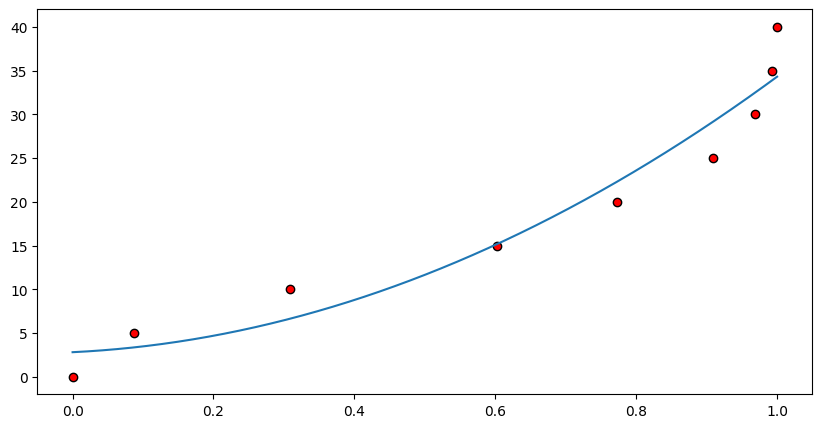

In [558]:
fig = ajusta_polinomio(df_duracoes, 2)

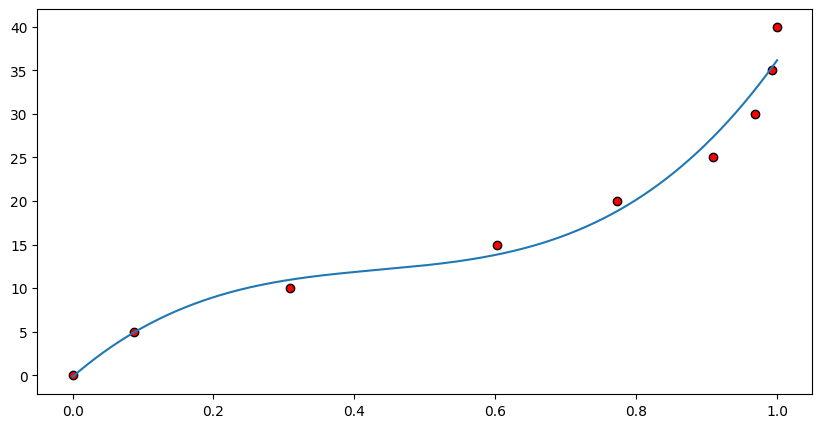

In [559]:
fig = ajusta_polinomio(df_duracoes, 3)

In [560]:
def encontra_divisores(n):
    divisores = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisores.append(i)

    return divisores


In [561]:
encontra_divisores(60)

[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30]

In [562]:
def gerar_tabela_nan(df_tabela_ligantes: pd.DataFrame,
                     df_duracoes: pd.DataFrame,
                     tempo_maximo_espera: float = 10,
                     tempo_descanso: int = 0,
                     g: int = 5) -> list:

    """
    Função para gerar a lista de NANs para cada período do dia

    Args:
        df_tabela_ligantes (pd.DataFrame): DataFrame com a quantidade de ligantes. 
        (obrigatório)
        df_duracoes (pd.DataFrame): DataFrame com as durações das ligações. 
        (obrigatório)
        tempo_maximo_espera (float): Tempo máximo de espera (opcional, default=10)
        g (int): Grau do polinômio de ajuste (opcional, default=5)
    Returns:
        pd.DataFrame: DataFrame com a quantidade de NANs
    """

    coefs = metodo_minimos_quadrados.mmq(
        entradas=df_duracoes.loc[:, "percentagem_acumulada"],
        saidas=df_duracoes.loc[:, "duracao_conexao"],
        g=g)


    # conjunto de nan para cada periodo do dia 
    # (18:15 - 18:30, 18:30 - 18:45, ..., 18:00 - 18:15)
    coluna_nan = []

    # para cada linha (periodo do dia) da tabela de ligantes (96 linhas)
    for i, linha in df_tabela_ligantes.iterrows():

        # pega a qtd_ligantes para cada periodo do dia
        qtd_ligantes = linha["numero_medio_ligantes"]

        # gera aleatoriamente os momentos de ligação para cada periodo do dia
        momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
        # ordena os momentos de ligação para executar o algoritmo nan
        momentos_ligacoes.sort()
        
        # cria uma lista de atendentes necessários para atender as ligações para cada 
        # periodo do dia
        atendentes: list[dict] = []

        # para cada ligação
        for momento_ligacao in momentos_ligacoes:
            
            # gerando a duração da ligação
            aleatorio = np.random.rand()

            # gerando a duração da ligação
            duracao = abs(np.polyval(coefs, aleatorio))

            # para cada atendente, checar se ele estará ocupado no momento da 
            # ligação + tempo máximo de espera. Se não estiver, ele atende a ligação
            # se todos estiverem ocupados, criar um novo atendente
            for atendente in atendentes:

                fim_atendimento = atendente["fim_atendimento"] + tempo_descanso

                # checando se o atendente está ocupado daqui a 10 segundos do momento 
                # da ligação ocupado = atendente.checar_ocupado(momento_ligacao + 10)
                if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                    ocupado = False
                else:
                    ocupado = True

                if not ocupado:
                    # se o atendente não estiver ocupado, ele atende a ligação
                    # atendente.atender_ligacao_futura(duracao)
                    if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                        atendente["inicio_atendimento"] = \
                            momento_ligacao + tempo_maximo_espera
                    else:
                        atendente["inicio_atendimento"] = fim_atendimento
                    
                    atendente["fim_atendimento"] = \
                        atendente["inicio_atendimento"] + duracao
                    break
            else:
                # entra aqui apenas se nunca ocorrer o break (ou seja, 
                # se todos os atendentes estiverem ocupados)

                novo_atendende = {"inicio_atendimento": momento_ligacao, 
                                "fim_atendimento": momento_ligacao + duracao}
                atendentes.append(novo_atendende)

        # após 'varrer' todas as ligações simuladas de cada período do dia, coletar a 
        # quantidade de atendentes criados para atender todas as ligações com 
        # 10 segundos de tempo máximo de espera    
        nan = len(atendentes)
        
        # antes de partir para a simulação do próximo período do dia, adicionar o 
        # resultado na coleção de nan para cada período do dia
        coluna_nan.append(nan)

    return coluna_nan

In [563]:
gerar_tabela_nan(
    df_tabela_ligantes,
    df_duracoes,
    10, 0, 5
)

[20,
 9,
 8,
 10,
 8,
 6,
 6,
 7,
 6,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 5,
 8,
 7,
 8,
 18,
 21,
 23,
 23,
 39,
 47,
 38,
 42,
 60,
 63,
 62,
 67,
 71,
 73,
 69,
 71,
 67,
 74,
 65,
 68,
 54,
 63,
 59,
 61,
 61,
 68,
 67,
 69,
 67,
 65,
 63,
 63,
 66,
 72,
 70,
 68,
 65,
 67,
 71,
 72,
 76,
 70,
 75,
 66,
 52,
 52,
 46,
 50,
 44,
 37,
 40,
 38,
 41,
 38,
 37,
 37,
 34,
 35,
 30,
 29,
 30,
 26,
 28,
 28,
 25,
 17,
 16,
 19]

In [564]:
def gera_tabelas(
        qtd_horas_total, minutos_dividir,
        hora_inicial, minuto_inicial,
        turnos, encargos):

    hora_final = (hora_inicial + qtd_horas_total) % 24
    minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60

    dia_final = 1
    if hora_inicial == hora_final and minuto_inicial == minuto_final:
        dia_final = 2
    
    inicios = \
        pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
        f"2000-01-{dia_final} {int(hora_final):02}:{int(minuto_final):02}:59", "%Y-%m-%d %H:%M:%S"),
        freq=f"{minutos_dividir}min").strftime("%H:%M:%S").tolist()[:-1]
    
    finais = \
        [(dtm.strptime(inicio, "%H:%M:%S") + td(minutes=minutos_dividir)).strftime("%H:%M:%S") 
        for inicio in inicios]
    
    df_nad = pd.DataFrame({
        "regime": turnos,
        "enc": encargos})
    
    df_tabela_ligantes = pd.DataFrame({
        "rotulo": range(1, len(inicios) + 1),
        "hora_inicio": inicios,
        "hora_fim": finais})
    df_tabela_ligantes["numero_medio_ligantes"] = ""

    return df_nad, df_tabela_ligantes 	

In [565]:
encargos = [560, 640, 980]

In [566]:
turnos = [3, 4, 6]

In [567]:
df_nad, df_tabela_ligantes = gera_tabelas(  qtd_dias_total, 
                                            minutos_dividir,
                                            hora_inicial, minuto_inicial,
                                            turnos, 
                                            encargos)

In [568]:
df_nad

,regime,enc
0,3,560
1,4,640
2,6,980


In [569]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,
1,2,00:15:00,00:30:00,
2,3,00:30:00,00:45:00,
3,4,00:45:00,01:00:00,
